#Summary


1.   Loading the dataset and perform statistics(no of unique rows,null rows,correlation between cols.....)
2.   Normalize the data and perform split--->(train,test)
3.   Build neural network

    -> Intialize random weights and biases
    
    -> Consider Activation function
    
    -> Define forward,backward,train functions
    
    -> Intialize epochs,learning rate,no of neurons in a layer
4. Calculate train loss,validation loss and R2 score





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/iiitbmlproject/Assignment2_q2_dataset.csv")

In [ ]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
df.shape

(14620, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

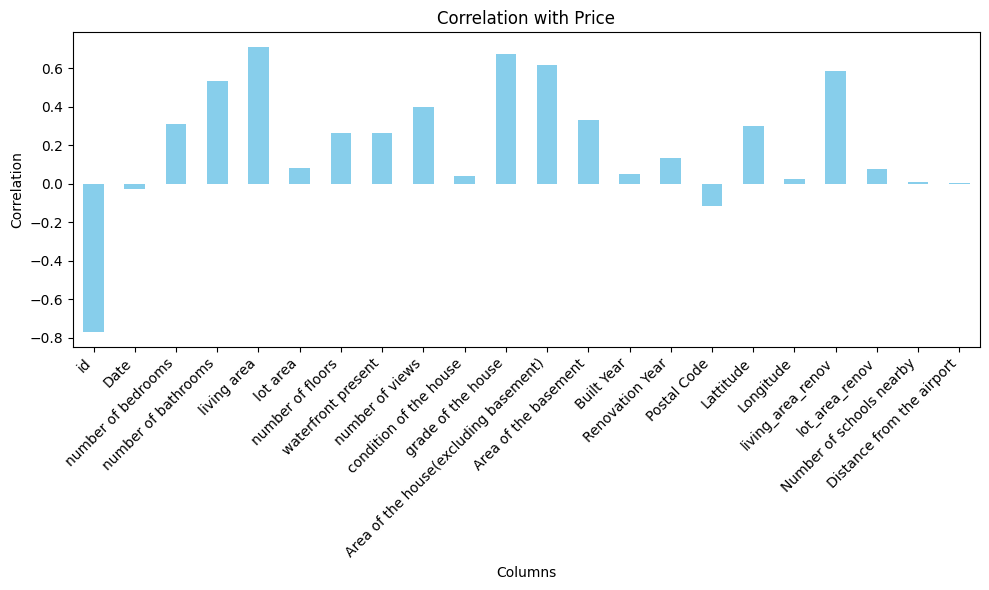

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_price = df.corrwith(df['Price'])
correlation_with_price = correlation_with_price.drop('Price')

plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar', color='skyblue')
plt.title('Correlation with Price')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Scaling the entire dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values[:,:-1])
scaled_data

array([[0.00578811, 0.        , 0.125     , ..., 0.00848087, 0.5       ,
        0.26666667],
       [0.0284775 , 0.        , 0.09375   , ..., 0.00598072, 0.5       ,
        0.03333333],
       [0.04528616, 0.        , 0.125     , ..., 0.01062386, 0.        ,
        0.1       ],
       ...,
       [0.95378774, 1.        , 0.03125   , ..., 0.00976666, 0.5       ,
        0.46666667],
       [0.95800148, 1.        , 0.09375   , ..., 0.01067922, 1.        ,
        0.13333333],
       [0.99291535, 1.        , 0.0625    , ..., 0.00505209, 0.5       ,
        0.16666667]])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

target_column = df.values[:, -1]
X = scaled_data
Y = target_column.reshape(-1, 1)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_hidden_output =  np.zeros((1, output_size))


    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        # Forward propagation
        self.hidden = self.relu(np.dot(X, self.weights_input_hidden) + self.bias_input_hidden)
        self.output = np.dot(self.hidden, self.weights_hidden_output) + self.bias_hidden_output
        return self.output

    def backward(self, X, y, learning_rate):
        # Backward propagation
        max_gradient = 1.0  # Define your maximum gradient threshold

        output_error = self.output - y
        hidden_error = np.dot(output_error, self.weights_hidden_output.T)

        # Compute gradients
        output_delta = output_error
        hidden_delta = hidden_error * self.relu_derivative(self.hidden)

        #gradient clipping,used to prevent exploding gradients during training
        hidden_delta_norm = np.linalg.norm(hidden_delta)
        output_delta_norm = np.linalg.norm(output_delta)
        if hidden_delta_norm > max_gradient:
          hidden_delta *= max_gradient / hidden_delta_norm
        if output_delta_norm > max_gradient:
          output_delta *= max_gradient / output_delta_norm

        #update weights and biases using the clipped deltas
        self.weights_hidden_output -= learning_rate * np.dot(self.hidden.T, output_delta)
        self.bias_hidden_output -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden -= learning_rate * np.dot(X.T, hidden_delta)
        self.bias_input_hidden -= learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)


    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate):
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            # Training phase
            train_output = self.forward(X_train)
            self.backward(X_train, y_train, learning_rate)
            train_loss = np.mean(np.square(y_train - train_output))
            train_losses.append(train_loss)

            # Validation phase
            val_output = self.forward(X_val)
            val_loss = np.mean(np.square(y_val - val_output))
            val_losses.append(val_loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Training Loss {train_loss}, Validation Loss {val_loss}")

        return train_losses, val_losses

    def predict(self, X):
        return self.forward(X)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Train the model
train_losses, val_losses = model.train(X_train, y_train.reshape(-1, 1), X_val, y_val.reshape(-1, 1), epochs=3000, learning_rate=0.001)

# Make predictions
predictions = model.predict(X_test)


Epoch 0: Training Loss 422929184787.5159, Validation Loss 422350897643.8658
Epoch 100: Training Loss 418868492789.9989, Validation Loss 418197360696.6578
Epoch 200: Training Loss 391303441279.9224, Validation Loss 390505000110.0574
Epoch 300: Training Loss 325999738173.4158, Validation Loss 325374897250.6016
Epoch 400: Training Loss 235139765508.55896, Validation Loss 235417114862.56342
Epoch 500: Training Loss 161483953930.77457, Validation Loss 163379452622.12616
Epoch 600: Training Loss 130918133398.61383, Validation Loss 134160294982.32745
Epoch 700: Training Loss 123049615468.4396, Validation Loss 126914723504.17615
Epoch 800: Training Loss 120222359872.00824, Validation Loss 124341703977.84517
Epoch 900: Training Loss 118149457505.34619, Validation Loss 122392812530.1202
Epoch 1000: Training Loss 116180310456.873, Validation Loss 120503199659.61496
Epoch 1100: Training Loss 114226311387.0996, Validation Loss 118612894529.2286
Epoch 1200: Training Loss 112273133164.53886, Validati

In [ ]:
# class NeuralNetwork:
#     def __init__(self, input_size, hidden_sizes, output_size):
#         self.input_size = input_size
#         self.hidden_sizes = hidden_sizes
#         self.output_size = output_size

#         self.weights = []
#         self.biases = []

#         layer_sizes = [input_size] + hidden_sizes + [output_size]

#         # Xavier initialization for weights and biases
#         for i in range(len(layer_sizes) - 1):
#             self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(1.0 / layer_sizes[i]))
#             self.biases.append(np.zeros((1, layer_sizes[i+1])))

#     def relu(self, x):
#         return np.maximum(0, x)

#     def relu_derivative(self, x):
#         return np.where(x > 0, 1, 0)

#     def forward(self, X):
#         self.activations = []
#         self.activations.append(X)

#         # Forward propagation through hidden layers
#         for i in range(len(self.weights) - 1):
#             layer_input = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
#             layer_output = self.relu(layer_input)
#             self.activations.append(layer_output)

#         # Output layer
#         output = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
#         self.activations.append(output)
#         return output

#     def backward(self, X, y, learning_rate):
#         # Backpropagation with multiple hidden layers
#         output_error = self.activations[-1] - y

#         # Compute gradients for output layer
#         output_delta = output_error
#         self.weights[-1] -= learning_rate * np.dot(self.activations[-2].T, output_delta)
#         self.biases[-1] -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)

#         # Backpropagate the error through hidden layers
#         for i in range(len(self.weights) - 2, -1, -1):
#             hidden_error = np.dot(output_delta, self.weights[i + 1].T)
#             hidden_delta = hidden_error * self.relu_derivative(self.activations[i + 1])

#             self.weights[i] -= learning_rate * np.dot(self.activations[i].T, hidden_delta)
#             self.biases[i] -= learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

#             output_delta = hidden_delta

#     def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate):
#         train_losses = []
#         val_losses = []

#         for epoch in range(epochs):
#             # Forward pass on training data
#             train_output = self.forward(X_train)

#             # Backward pass on training data
#             self.backward(X_train, y_train, learning_rate)

#             # Calculate training loss
#             train_loss = np.mean(np.square(y_train - train_output))
#             train_losses.append(train_loss)

#             # Forward pass on validation data
#             val_output = self.forward(X_val)

#             # Calculate validation loss
#             val_loss = np.mean(np.square(y_val - val_output))
#             val_losses.append(val_loss)

#             if epoch % 100 == 0:
#                 print(f"Epoch {epoch}: Training Loss {train_loss}, Validation Loss {val_loss}")

#         return train_losses, val_losses

#     def predict(self, X):
#         return self.forward(X)

# input_size = X_train.shape[1]
# hidden_sizes = [64, 64, 64]
# output_size = 1
# model = NeuralNetwork(input_size, hidden_sizes, output_size)
# train_losses, val_losses = model.train(X_train, y_train.reshape(-1, 1), X_val, y_val.reshape(-1, 1), epochs=2000, learning_rate=0.001)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.4336409870770399
